In [1]:
 !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 16712 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .../0


Creating config file /etc/apt/apt.conf.d/50unattended-upgrades with new version
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up dirmngr (2.1.15-1ubuntu8) ...
Setting up cron (3.0pl1-128ubuntu5) ...
Adding group `crontab' (GID 102) ...
Done.
update-rc.d: warning: start and stop actions are no longer supported; falling back to defaults
update-rc.d: warning: stop runlevel arguments (1) do not match cron Default-Stop values (none)
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Setting up kmod (24-1ubuntu2) ...
Setting up libdbus-glib-1-2:amd64 (0.108-2) ...
Setting up python3-gi (3.24.1-2build1) ...
Setting up module-init-tools (24-1ubuntu2) ...
Setting up python3-software-properties (0.96.24.17) ...
Setting up dbus (1.10.22-1ubuntu1) ...
Setting up python-apt (1.4.0~beta3build2) ...
Setting up python3-dbus (1.2.4-1buil

In [0]:
from google.colab import auth
auth.authenticate_user()

In [3]:
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p my_drive
!google-drive-ocamlfuse my_drive
!mkdir -p my_drive/mnist

In [55]:
!ls ~/my_drive/mnist

mnist.csv  test.csv  train.csv


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler

sns.set(style='white', context='notebook', palette='deep')

Using TensorFlow backend.


In [56]:
train_set = pd.read_csv('../content/my_drive/mnist/train.csv')
test_set = pd.read_csv('../content/my_drive/mnist/test.csv')
train_set


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1]:
train_label = train_set["label"]

# Drop 'label' column
train_samples = train.drop(labels = ["label"],axis = 1) 

# free some space
del train_set 

g = sns.countplot(train_label)

train_label.value_counts()

NameError: ignored

In [84]:
train_samples.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [18]:
test_set.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [0]:
#perform a grayscale normalization to reduce the effect of illumination's differences.
train_samples = train_samples.astype("float32") / 255.0
test_set = test_set.astype("float32") / 255.0

In [0]:

train_samples = train_samples.values.reshape(-1,28,28,1)
test_set = test_set.values.reshape(-1,28,28,1)

In [0]:

train_label = to_categorical(train_label, num_classes = 10)

In [0]:

train_samples, samples_val, train_label, label_val = train_test_split(train_samples, train_label, test_size = 0.1, random_state=5)


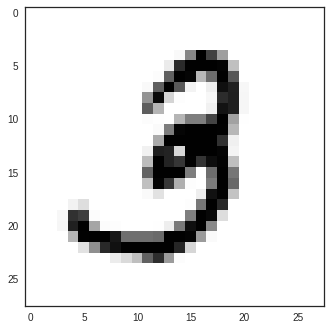

In [63]:
g = plt.imshow(train_samples[0][:,:,0])

In [0]:


model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(500, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(10, activation = "softmax"))

In [0]:

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [0]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [0]:
epochs = 10
batch_size = 65

In [0]:


datagen = ImageDataGenerator(zoom_range = 0.1,
                            height_shift_range = 0.1,
                            width_shift_range = 0.1,
                            rotation_range = 10)


datagen.fit(train_samples)

In [115]:

history = model.fit_generator(datagen.flow(train_samples,train_label, batch_size=batch_size),
                              epochs = epochs, validation_data = (samples_val,label_val),
                              verbose = 2, steps_per_epoch=train_samples.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])


Epoch 1/20
 - 14s - loss: 0.0755 - acc: 0.9769 - val_loss: 0.0376 - val_acc: 0.9886
Epoch 2/20
 - 14s - loss: 0.0685 - acc: 0.9793 - val_loss: 0.0492 - val_acc: 0.9881
Epoch 3/20
 - 14s - loss: 0.0594 - acc: 0.9824 - val_loss: 0.0431 - val_acc: 0.9902
Epoch 4/20
 - 14s - loss: 0.0569 - acc: 0.9822 - val_loss: 0.0390 - val_acc: 0.9905
Epoch 5/20


KeyboardInterrupt: ignored

In [0]:

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(250, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [0]:
datagen = ImageDataGenerator(zoom_range = 0.1,
                            height_shift_range = 0.1,
                            width_shift_range = 0.1,
                            rotation_range = 10)

In [0]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [0]:
model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=["accuracy"])

In [1]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

NameError: ignored

In [94]:
hist = model.fit_generator(datagen.flow(train_samples, train_label, batch_size=50),
                           steps_per_epoch=15,
                           epochs=30,
                           verbose=2, 
                           validation_data = (samples_val,label_val),
                           callbacks=[learning_rate_reduction])

Epoch 1/30
 - 2s - loss: 2.2264 - acc: 0.1827 - val_loss: 1.6123 - val_acc: 0.5729
Epoch 2/30
 - 1s - loss: 1.5633 - acc: 0.4813 - val_loss: 0.7182 - val_acc: 0.7760
Epoch 3/30
 - 1s - loss: 1.0640 - acc: 0.6360 - val_loss: 0.3590 - val_acc: 0.9093
Epoch 4/30
 - 1s - loss: 0.8389 - acc: 0.7320 - val_loss: 0.3328 - val_acc: 0.9183
Epoch 5/30
 - 1s - loss: 0.6466 - acc: 0.7960 - val_loss: 0.5763 - val_acc: 0.8081
Epoch 6/30
 - 1s - loss: 0.6634 - acc: 0.7853 - val_loss: 0.2676 - val_acc: 0.9155
Epoch 7/30
 - 1s - loss: 0.6281 - acc: 0.7973 - val_loss: 0.3265 - val_acc: 0.8933
Epoch 8/30
 - 1s - loss: 0.4649 - acc: 0.8533 - val_loss: 0.2310 - val_acc: 0.9307
Epoch 9/30
 - 1s - loss: 0.5577 - acc: 0.8400 - val_loss: 0.1816 - val_acc: 0.9445
Epoch 10/30
 - 1s - loss: 0.4122 - acc: 0.8760 - val_loss: 0.3991 - val_acc: 0.8757
Epoch 11/30
 - 1s - loss: 0.4537 - acc: 0.8307 - val_loss: 0.1502 - val_acc: 0.9533
Epoch 12/30
 - 1s - loss: 0.3478 - acc: 0.8907 - val_loss: 0.1633 - val_acc: 0.9498
E

In [0]:
# predict results
results = model.predict(test_set)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [0]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv(path_or_buf="~/my_drive/mnist/mnist1.csv",index=False)